In [43]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense ,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
%matplotlib inline

In [2]:
train_path = 'E:/checkbox/train'
test_path = 'E:/checkbox/test'
valid_path = 'E:/checkbox/valid'

In [3]:
#  generate batches of tensor image data and this is the format that the actual images need to be in to be read by the keras model  so takimg the path to a directory and generates batches of the normalized data so 
# targetsize : height and weidth of the image
# batchsize : the size of the batches of the image (different values becouse the diffenet number of photos)
# 
train_batches = ImageDataGenerator().flow_from_directory(train_path , target_size=(224,224), classes= ['true','false' , 'notselected'],batch_size = 10)
test_batches  = ImageDataGenerator().flow_from_directory(test_path , target_size=(224,224), classes= ['true','false' , 'notselected'],batch_size = 15)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path , target_size=(224,224), classes= ['true','false' , 'notselected'],batch_size = 5)

Found 60 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [4]:
# plot images with their respective labels within my jupyter notebook
def plots (ims ,figsize =(12,6),rows =1 , interp =False , titles = None):
    if type (ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
            
    f=plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2==0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows , cols ,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize= 16)
        plt.imshow(ims[i] , interpolation = None if interp else 'none')  



In [5]:
# grap a batch of data from my train batches variable that we created up
# every time i call next on train batches i'm going to get another batch of size 10 from the total 40 images in my training set 
imgs , labels = next(train_batches)

c:\users\ghada\appdata\local\programs\python\python35\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


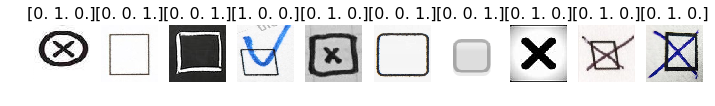

In [6]:
plots(imgs , titles=labels)

In [7]:
# sequential model: the first layer is convolutional layer and keras conv2 (two-dimensional convolutional) for 2d images 
# 32 the number of output filters in the convolution
# (3,3) kernal size is a tuple of of 2 int that specifying the width and height of the 2 dimensional convolution window 
# specify input_shape of the first layer of any sequential model (height , weidth , channel dimensions of the images ex 3 for RGB color scale)
# flatten layer this take the output from the previous layer and flattening it into a one dimensional tensor then going to be fed into this dense layer that has three nodes becouse our output layer is categorizing images either as true or false or not selected
model = Sequential([
        Conv2D(32,(3,3), activation= 'relu' , input_shape =(224 ,224,3)),
        Flatten(),
        Dense(3,activation ='softmax'),
])

In [8]:
# compiling the model using adam optimization with learning rate 0.0 
# specify the array with the single string accuracy as my metrics lastly 
model.compile(Adam(lr=.0001),loss='categorical_crossentropy' , metrics = ['accuracy'])

In [9]:
# training the model: fit generator fits the model on data generated batch by batch by image data generator 
# steps for epoch is the total number of steps or that batches samples to yield from the generator before declaring one epoch is finished so 
# 60 images total in training set then to iterate overall the images one time with a batch size of 10 -> steps per epoch = 6
# 30 images in valid set , batchsize=5 -> steps = 6
# how many epoch do we want to run epoch =
# verosity : how much output we want to see printed to the console 
model.fit_generator(train_batches , steps_per_epoch = 6 , validation_data = valid_batches , validation_steps = 6 ,epochs=5 , verbose =2)

Epoch 1/5


c:\users\ghada\appdata\local\programs\python\python35\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10s - loss: 8.7062 - acc: 0.3833 - val_loss: 10.2081 - val_acc: 0.3667
Epoch 2/5
11s - loss: 9.9761 - acc: 0.3667 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 3/5
15s - loss: 10.0310 - acc: 0.3667 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 4/5
15s - loss: 8.9381 - acc: 0.4333 - val_loss: 10.2081 - val_acc: 0.3667
Epoch 5/5
13s - loss: 10.8186 - acc: 0.3167 - val_loss: 9.6709 - val_acc: 0.4000


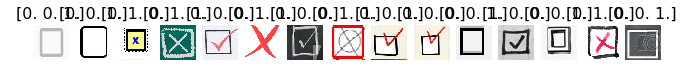

In [10]:
test_img , test_labels = next(test_batches)
plots(test_img, titles = test_labels)

In [11]:
# image label with Multilabel-indicator 
test_labels = test_labels[:]
test_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [12]:
#predict and classify images so model.predict and predict generator :generates predictions for the input samples from data generator(test_batches)
predictions = model.predict_generator(test_batches , steps = 1 , verbose =0)
predictions

array([[1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.2012e-41]], dtype=float32)

In [13]:
# cm = confusion_matrix(test_labels , predictions[:])
# The confusion matrix takes a vector of labels (not the one-hot encoding). Multilabel-indicator is not supported for confusion matrix
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
test_labels.argmax(axis=1)

array([2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2], dtype=int64)

In [14]:
def plot_confusion_matrix(cm , classes , normalize = False , title = 'Confusion Matrix' , cmap = plt.cm.Blues):
    # this function prints and plots the confusion matrix 
    # normalization can be applied by setting by setting 'normalization = true'
    plt.imshow(cm , interpolation = 'nearest' , cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation = 45)
    plt.yticks(tick_marks , classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis-1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print ('Confusion matrix , without normalization')
    print(cm)
    thresh = cm.max() /2
    for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix , without normalization
[[5 0 0]
 [5 0 0]
 [5 0 0]]


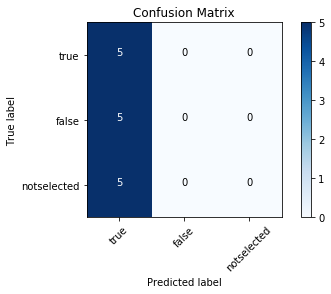

In [15]:
cm_plot_labels = ['true','false','notselected']
plot_confusion_matrix(cm , cm_plot_labels , title = 'Confusion Matrix')

In [16]:
# using a pretrained exsiting model called vgg16 fine-tune
vgg16_model = keras.applications.vgg16.VGG16()

In [17]:
# the last dense layer has 1000 output
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
type(vgg16_model)

keras.engine.training.Model

In [19]:
# tranform from model to sequentional model 
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
# pop the last layer
model.layers.pop()

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [23]:
# freeze layer so never update the above layers 
for layer in model.layers:
    layer.trainable = False 

In [24]:
model.add(Dense(3,activation = 'softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
#compile new model
model.compile(Adam(lr = .0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [27]:
model.fit_generator(train_batches , steps_per_epoch =6 , 
                    validation_data= valid_batches ,
                    validation_steps = 6 , epochs = 5 , verbose = 2)

Epoch 1/5
347s - loss: 1.0995 - acc: 0.3167 - val_loss: 1.0992 - val_acc: 0.3333
Epoch 2/5
284s - loss: 1.0900 - acc: 0.5500 - val_loss: 1.0954 - val_acc: 0.3000
Epoch 3/5
242s - loss: 1.0831 - acc: 0.6333 - val_loss: 1.0935 - val_acc: 0.3333
Epoch 4/5
232s - loss: 1.0774 - acc: 0.7167 - val_loss: 1.0881 - val_acc: 0.4333
Epoch 5/5
227s - loss: 1.0687 - acc: 0.8667 - val_loss: 1.0854 - val_acc: 0.5333


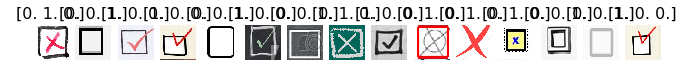

In [28]:
test_imgs , test_labels = next(test_batches)
plots(test_imgs , titles = test_labels)

In [30]:
test_labels= test_labels[:]
test_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [31]:
predictions = model.predict_generator(test_batches , steps = 1 , verbose = 0)

In [32]:
# cm = confusion_matrix(test_labels , np.round(predictions))
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

Confusion matrix , without normalization
[[1 2 2]
 [0 3 2]
 [0 3 2]]


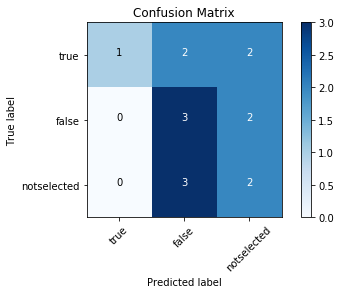

In [33]:
cm_plot_labels = ['true' , 'false' , 'notselected']
plot_confusion_matrix(cm , cm_plot_labels , title = 'Confusion Matrix')

In [85]:
# using transfer learning fine tune mobilenet on pretrained dataset
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path , target_size=(224,224),batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path , target_size=(224,224),batch_size = 6)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path , target_size=(224,224),batch_size = 15 , shuffle = False)
# not shuffle becouse of using static labels that returned from test batches classes  (becouse the labels won't map correctly to the data)

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [66]:
mobile = keras.applications.mobilenet.MobileNet()

In [67]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [68]:
#grap the output from the sixth to last layer of the original mobile net and store it in x (removing the last 5 layers)
x = mobile.layers[-6].output
predictions = Dense(3 , activation = 'softmax')(x)
# build a new model which identical to the original mobile net up to sixth last layer
model = Model(inputs = mobile.input , outputs = predictions)

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [70]:
# freeze all layers (wont be updated) except for the last five layers in our new model
for layer in model.layers[:-5]:
    layer.trainable = False

In [71]:
model.compile(Adam(lr =.0001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [72]:
model.fit_generator(train_batches , steps_per_epoch =6 , validation_data = valid_batches , validation_steps = 5 , epochs = 5 , verbose = 2)

Epoch 1/5
64s - loss: 1.9216 - acc: 0.3000 - val_loss: 2.4832 - val_acc: 0.3333
Epoch 2/5
62s - loss: 0.8421 - acc: 0.6167 - val_loss: 4.1151 - val_acc: 0.3333
Epoch 3/5
70s - loss: 0.4865 - acc: 0.8500 - val_loss: 4.9996 - val_acc: 0.3333
Epoch 4/5
74s - loss: 0.4100 - acc: 0.8667 - val_loss: 5.0850 - val_acc: 0.3333
Epoch 5/5
68s - loss: 0.2258 - acc: 0.9500 - val_loss: 4.7695 - val_acc: 0.3333


In [73]:
# give the class name or the label 
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [74]:
# give the mapping from the underlying class names
test_batches.class_indices

{'false': 0, 'notselected': 1, 'true': 2}

In [75]:
predictions = model.predict_generator(test_batches , steps =1 , verbose =0)

In [76]:
# cm is confusion
# results stored in predictions calling argmax on the predictions is going to return the indices that contain the maximum values from the list of predictions
cm = confusion_matrix(test_labels , predictions.argmax(axis = 1))

In [77]:
test_batches.class_indices

{'false': 0, 'notselected': 1, 'true': 2}

Confusion matrix , without normalization
[[0 5 0]
 [0 5 0]
 [0 5 0]]


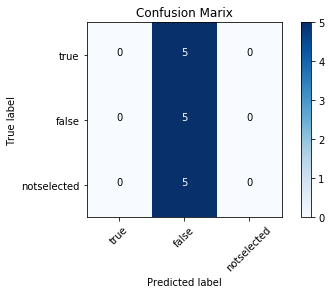

In [78]:
cm_plot_labels = ['true' , 'false' , 'notselected']
plot_confusion_matrix(cm,cm_plot_labels , title = 'Confusion Marix')

In [105]:
# using transfer learning fine tune mobilenet on new dataset
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path , target_size=(224,224),batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path , target_size=(224,224),batch_size = 6)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path , target_size=(224,224),batch_size = 15 , shuffle = False)
# not shuffle becouse of using static labels that returned from test batches classes  (becouse the labels won't map correctly to the data)

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [106]:
mobile = keras.applications.mobilenet.MobileNet()

In [107]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [108]:
x = mobile.layers[-6].output
predictions = Dense(3 , activation = 'softmax')(x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [109]:
# train the last 23 layers
for layer in model.layers[:-23]:
    layer.trainable = False 

In [110]:
model.compile(Adam(lr =.0001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [112]:
model.fit_generator(train_batches , steps_per_epoch =6 , validation_data = valid_batches , validation_steps = 5 , epochs = 5 , verbose = 2)

Epoch 1/5
85s - loss: 0.2220 - acc: 0.9500 - val_loss: 3.9406 - val_acc: 0.3333
Epoch 2/5
72s - loss: 0.0581 - acc: 1.0000 - val_loss: 3.1117 - val_acc: 0.3333
Epoch 3/5
60s - loss: 0.1420 - acc: 0.9500 - val_loss: 2.6431 - val_acc: 0.4333
Epoch 4/5
59s - loss: 0.0630 - acc: 0.9833 - val_loss: 2.5288 - val_acc: 0.5333
Epoch 5/5
59s - loss: 0.0625 - acc: 1.0000 - val_loss: 2.7062 - val_acc: 0.5000


In [113]:
test_labels = test_batches.classes
predictions = model.predict_generator(test_batches , steps = 1 , verbose =0)

In [114]:
cm = confusion_matrix(test_labels , predictions.argmax(axis = 1))

In [115]:
test_batches.class_indices

{'false': 0, 'notselected': 1, 'true': 2}

Confusion matrix , without normalization
[[0 5 0]
 [0 5 0]
 [0 5 0]]


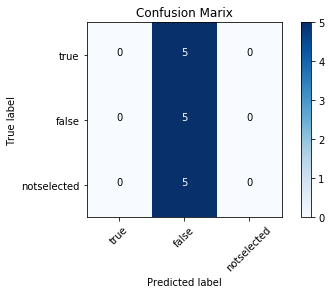

In [119]:
cm_plot_labels = ['true' , 'false' , 'notselected']
plot_confusion_matrix(cm,cm_plot_labels , title = 'Confusion Marix')